In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import shapiro
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu

In [2]:
df = pd.read_csv('data/new-site.csv', sep='\t')
df.head()

,site,dwell-time
0,0,2
1,1,48
2,0,15
3,1,16
4,0,38


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   site        300 non-null    int64
 1   dwell-time  300 non-null    int64
dtypes: int64(2)
memory usage: 4.8 KB


### 34

In [4]:
grouped_sum = df.groupby('site')['dwell-time'].sum()
grouped_sum

site
0    16898
1    10032
Name: dwell-time, dtype: int64

### 35

In [5]:
grouped_mean = df.groupby('site')['dwell-time'].mean().round()
grouped_mean

site
0    91.0
1    88.0
Name: dwell-time, dtype: float64

# 36

проверка данных на нормальность

In [6]:
H0 = 'Данные распределены нормально'
Ha = 'Данные не распределены нормально (отвергаем H0)'

# уровень значимости
alpha = 0.05

In [7]:
_, p = shapiro(df['dwell-time'])
print('p=%.3f' % p)

# Интерпретация 
if p > alpha:
	print(H0)
else:
	print(Ha)

p=0.000
Данные не распределены нормально (отвергаем H0)


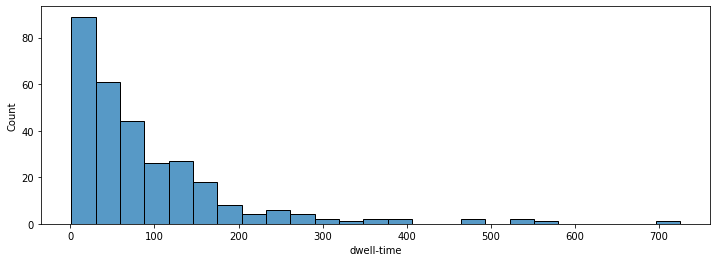

In [8]:
# Дополнительная проверка на нормальность данных при помощи визуализации
fig = plt.figure(figsize=(12, 4))
sns.histplot(df, x='dwell-time');

данные распределены не нормально => непараметрический тест

In [9]:
data_0 = df[df['site'] == 0]
data_1 = df[df['site'] == 1]

print(data_0.shape, data_1.shape)

(186, 2) (114, 2)


p=0.000
Данные не распределены нормально (отвергаем H0)


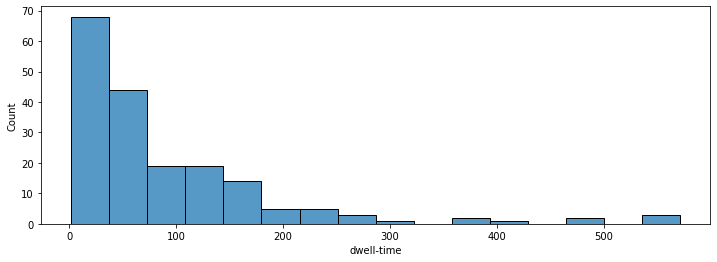

In [10]:
_, p = shapiro(data_0['dwell-time'])
print('p=%.3f' % p)

# Интерпретация 
if p > alpha:
	print(H0)
else:
	print(Ha)
 
fig = plt.figure(figsize=(12, 4))
sns.histplot(data_0, x='dwell-time');

p=0.000
Данные не распределены нормально (отвергаем H0)


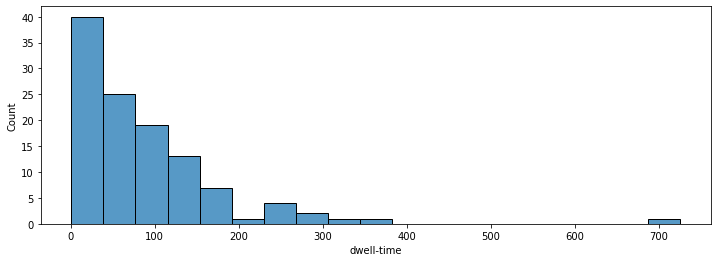

In [11]:
_, p = shapiro(data_1['dwell-time'])
print('p=%.3f' % p)

# Интерпретация 
if p > alpha:
	print(H0)
else:
	print(Ha)
 
fig = plt.figure(figsize=(12, 4))
sns.histplot(data_1, x='dwell-time');

# 37

Критерий Манна-Уитни

In [13]:
H0 = 'Среднее время в группах одинаково'
Ha = 'Среднее время в группе А больше, чем в группе B'

# уровень значимости
alpha = 0.05

In [14]:
results = mannwhitneyu(
    x=data_0['dwell-time'],
    y=data_1['dwell-time'], 
    alternative='less'
)
print('p-value:', round(results.pvalue, 2))
 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))

p-value: 0.45
Принимаем нулевую гипотезу. Среднее время в группах одинаково
